In [83]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('Sleep_Efficiency.csv')

# Dropping records with nulls
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      388 non-null    int64  
 1   Age                     388 non-null    int64  
 2   Gender                  388 non-null    object 
 3   Bedtime                 388 non-null    object 
 4   Wakeup time             388 non-null    object 
 5   Sleep duration          388 non-null    float64
 6   Sleep efficiency        388 non-null    float64
 7   REM sleep percentage    388 non-null    int64  
 8   Deep sleep percentage   388 non-null    int64  
 9   Light sleep percentage  388 non-null    int64  
 10  Awakenings              388 non-null    float64
 11  Caffeine consumption    388 non-null    float64
 12  Alcohol consumption     388 non-null    float64
 13  Smoking status          388 non-null    object 
 14  Exercise frequency      388 non-null    fl

In [70]:
# Converting time columns to dattime datatype
df['Bedtime'] = df['Bedtime'].astype('datetime64[ns]')
df['Wakeup time'] = df['Wakeup time'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      388 non-null    int64         
 1   Age                     388 non-null    int64         
 2   Gender                  388 non-null    object        
 3   Bedtime                 388 non-null    datetime64[ns]
 4   Wakeup time             388 non-null    datetime64[ns]
 5   Sleep duration          388 non-null    float64       
 6   Sleep efficiency        388 non-null    float64       
 7   REM sleep percentage    388 non-null    int64         
 8   Deep sleep percentage   388 non-null    int64         
 9   Light sleep percentage  388 non-null    int64         
 10  Awakenings              388 non-null    float64       
 11  Caffeine consumption    388 non-null    float64       
 12  Alcohol consumption     388 non-null    float64   

In [71]:
# Making dummies for categorical columns Gender and Smoking
df_new = pd.get_dummies(df,drop_first=True,dtype=int)
df_new.head()

,ID,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
0,1,65,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1
1,2,69,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1
2,3,40,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0
3,4,40,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1
4,5,57,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0


In [72]:
# Making column names easier to utilise
df_new.columns = df_new.columns.str.replace(' ','_').str.lower()
df_new.columns

Index(['id', 'age', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'exercise_frequency', 'gender_male',
       'smoking_status_yes'],
      dtype='object')

In [74]:
# Dropping target and predictors that doesn't make sense to include in regression
X_cols = df_new.columns.drop(['sleep_efficiency','wakeup_time','bedtime','id'])

# Making model formula
pred = X_cols.str.replace('gender_male','C(gender_male)').str.replace('smoking_status_yes','C(smoking_status_yes)')
formula = 'sleep_efficiency ~ ' + ' + '.join(pred)

# Creating base model w/ summary
model = smf.ols(formula,df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       sleep_efficiency   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     155.7
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          3.28e-127
Time:                        14:55:37   Log-Likelihood:                 542.09
No. Observations:                 388   AIC:                            -1062.
Df Residuals:                     377   BIC:                            -1019.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0002   9.64e-06     23.541      0.000       0.000       0.000
C(gender_male)[T.1]            0.0014      0.007      0.207      0.836      -0.012       0.015
C(smoking_status_yes)[T.1]    -0.0460      0.007     -6.780      0.000      -0.059      -0.033
age                            0.0010      0.000      3.920      0.000       0.000       0.001
sleep_duration                 0.0017      0.004      0.497      0.620      -0.005       0.009
rem_sleep_percentage           0.0102      0.001     13.142      0.000       0.009       0.012
deep_sleep_percentage          0.0091      0.000     24.884      0.000       0.008       0.010
light_sleep_percentage         0.0035      0.000      8.427      0.000       0.003       0.004
awakenings                    -0.0319      0.003    -12.626      0.000      -0.037      -0.027
caffeine_consumption           0.0002      0.000      2.132      0.034    1.87e-05       0.000
alcohol_consumption           -0.0061      0.002     -2.895      0.004      -0.010      -0.002
exercise_frequency             0.0064      0.002      2.783      0.006       0.002       0.011
==============================================================================
Omnibus:                        8.616   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.678
Skew:                          -0.340   Prob(JB):                       0.0131
Kurtosis:                       2.726   Cond. No.                     2.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [117]:
# VIF calculation function
def calc_vif(colnames,df):
    vif =  pd.DataFrame()
    cols = sm.add_constant(df[colnames])
    vif['VIF'] = [variance_inflation_factor(cols.values,i) for i in range(cols.shape[1])]
    vif['Features'] = cols.keys()
    return vif

In [118]:
# VIF for base model
calc_vif(X_cols,df_new)

,VIF,Features
0,0.000000,const
1,1.111544,age
2,1.015337,sleep_duration
3,inf,rem_sleep_percentage
4,inf,deep_sleep_percentage
5,inf,light_sleep_percentage
6,1.230852,awakenings
7,1.130139,caffeine_consumption
8,1.224585,alcohol_consumption
9,1.161713,exercise_frequency


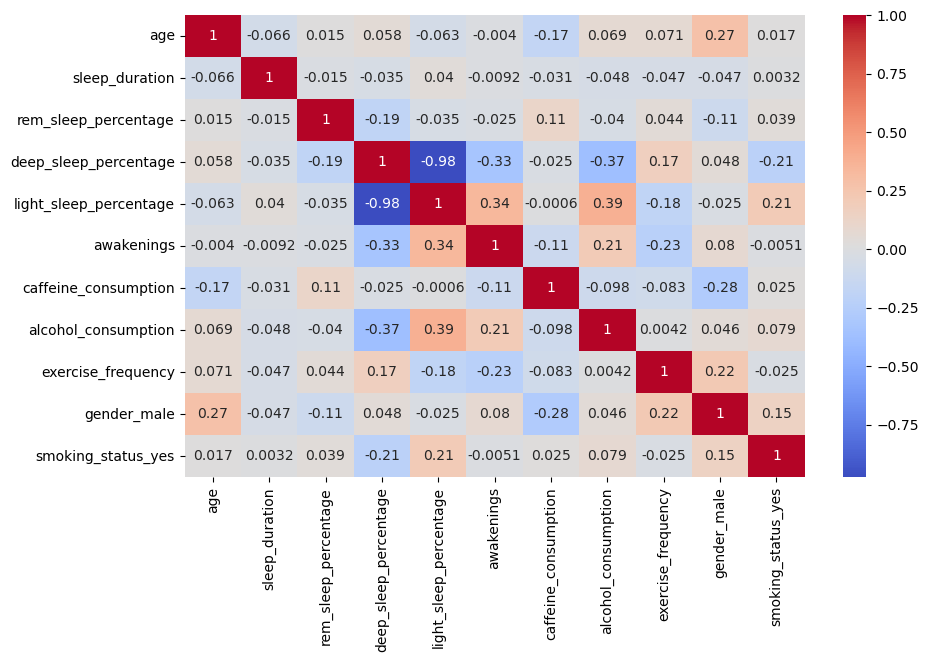

In [119]:
# Cross checking VIF of inf with heatmap
corr = df_new[X_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [120]:
# Rechecking VIF with dropping light_sleep_percentage
# Note: I could also remove deep_sleep_percentage, I chose at random
calc_vif(X_cols.drop('light_sleep_percentage'),df_new)

,VIF,Features
0,180.327531,const
1,1.111544,age
2,1.015337,sleep_duration
3,1.088641,rem_sleep_percentage
4,1.438063,deep_sleep_percentage
5,1.230852,awakenings
6,1.130139,caffeine_consumption
7,1.224585,alcohol_consumption
8,1.161713,exercise_frequency
9,1.271095,gender_male
